# Задание
**Цель:**  
Изучить применение моделей кластеризации.
**Описание задания:**  
В домашнем задании нужно сократить число цветов в палитре [изображения](https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg). Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage

### 1.Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [ ]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/feml_data/flower.jpeg')

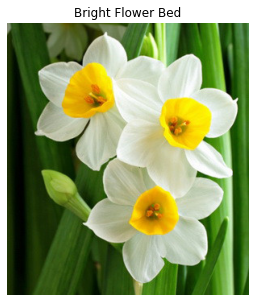

In [ ]:
draw_picture(img, title = 'Bright Flower', bgr=False)

### 2.Реализуйте три модели кластеризации:


#### a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
img.shape

(338, 300, 3)

In [ ]:
# перевод в двумерный массив длиной 466x700 и шириной 3
x, y, z = img.shape
image_2d = img.reshape(x*y, z)
image_2d.shape

(101400, 3)

In [ ]:
# функция для кластеризации, передаем кол-во кластеров и данные

def kmeans_func(clusters, X):
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(X)
    pred_clust = kmeans.fit_predict(X)
    cl_centers = kmeans.cluster_centers_
    cl_labels = kmeans.labels_
    return cl_centers, cl_labels, pred_clust


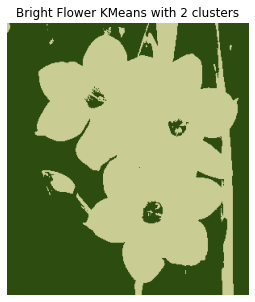

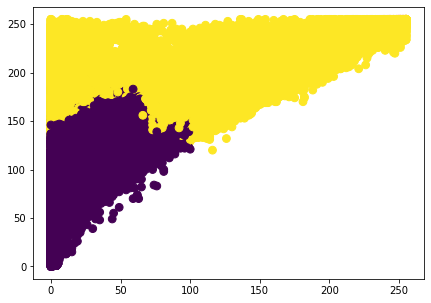

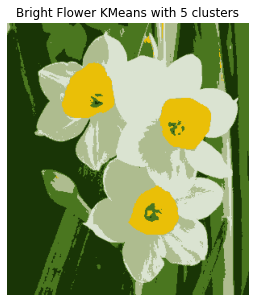

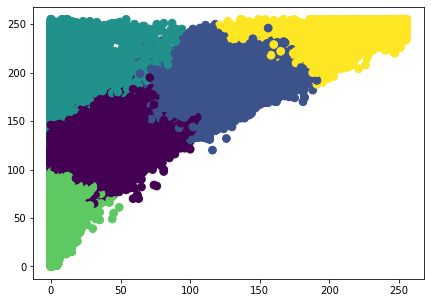

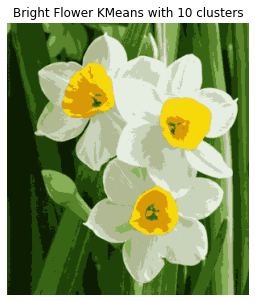

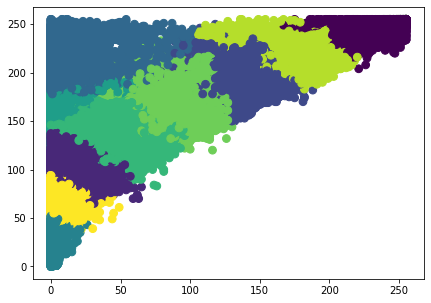

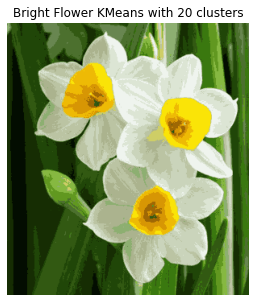

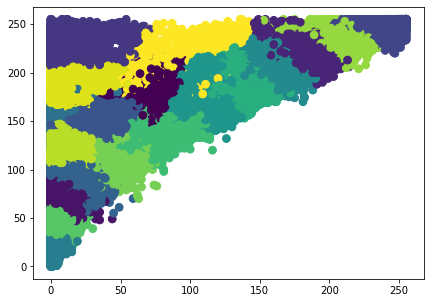

In [ ]:
clst = [2, 5, 10, 20]
img_dbscan = []
for i in clst:
    km1, km2, cls = kmeans_func(clusters = i, X = image_2d)
    image = km1[km2].reshape(x, y, z).astype('int')
    title = f'Bright Flower KMeans with {i} clusters'
    draw_picture(image, title = title , bgr=False)
    img_dbscan.append(image)
    plt.figure(figsize=(7, 5))
    plt.scatter(image_2d[:, 0], image_2d[:, 1], c=cls, s=60)

#### b) DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
X = image_2d

In [ ]:
dbscan_cls = DBSCAN(eps=1, min_samples=100).fit(X)

In [ ]:
labels = dbscan_cls.labels_

In [ ]:
clusters = dbscan_cls.fit_predict(X)

In [ ]:
# количество кластеров за исключением шума
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Количество кластеров: %d" % n_clusters_)
print("Количество точек шума: %d" % n_noise_)


Количество кластеров: 11
Количество точек шума: 98645


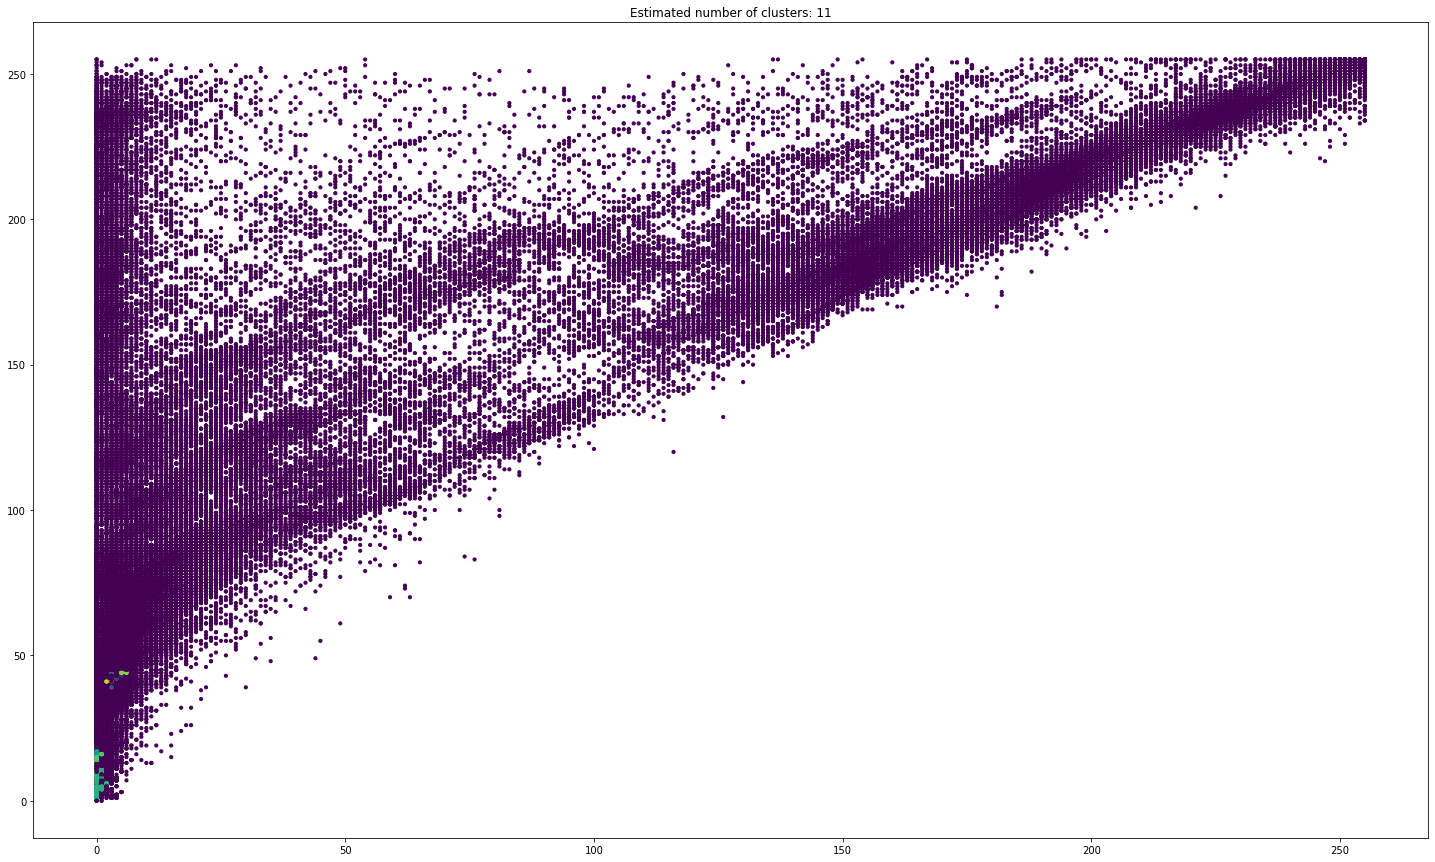

In [ ]:
plt.figure(figsize=(25, 15))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=10)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Основная часть, около 90% - это точки шума, кластеры сформированы плохо

In [ ]:
labels = dbscan_cls.labels_

In [ ]:
zipp_dbscan = list(zip(X, labels))

In [ ]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
# функция для нахождения центров кластеров за исключением кластера с меткой -1(шум)
def centers_of_clusters(zipp):
    classD = {}
    for i in zipp:
        if i[1] >= 0:
            if i[1] in classD.keys():
                classD[i[1]].append(i[0])
            else:
                classD[i[1]] = [i[0]]
    centers = {}
    k0 = []
    k1 = []
    k2 = []
    for i in classD:
        for j in classD[i]:
            k0.append(j[0])
            k1.append(j[1])
            k2.append(j[2])
        if i in centers:
            centers[i].append([sum(k0)/len(k0), sum(k1)/len(k1), sum(k2)/len(k2)])
        else:
            centers[i] = [sum(k0)/len(k0), sum(k1)/len(k1), sum(k2)/len(k2)]

    centers_lst = []
    for i in centers:
        centers_lst.append(centers[i])
    centers_lst = np.array(centers_lst)
    return centers_lst

In [ ]:
centers_lst_dbscan = centers_of_clusters(zipp_dbscan)

In [ ]:
centers_lst_dbscan

array([[ 4.13986014, 43.        , 21.4965035 ],
       [ 3.71698113, 42.53962264, 21.00754717],
       [ 4.18527919, 43.0177665 , 21.54060914],
       [ 3.87025948, 42.15968064, 21.75648703],
       [ 3.70894309, 42.50081301, 21.98699187],
       [ 3.57734807, 43.47928177, 22.69751381],
       [ 3.40524434, 43.13945173, 22.25268176],
       [ 2.92425793, 39.41351075, 19.604913  ],
       [ 2.40315877, 34.71654198, 16.26433915],
       [ 1.25664361, 18.55333091,  7.53986167],
       [ 1.25299456, 18.53430127,  7.52087114]])

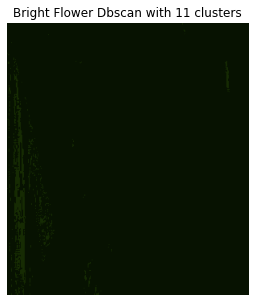

In [ ]:
# отрисовка картинки с учетом проведенной кластеризации DBSCAN
image_dbscan = centers_lst_dbscan[labels].reshape(x, y, z).astype('int')
title = f'Bright Flower Dbscan with {n_clusters_} clusters'
draw_picture(image_dbscan, title = title , bgr=False)

#### c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# изменение размера картинки
img_agg = cv2.resize(img, (100, 100))

In [ ]:
# перевод в двумерный массив
x, y, z = img_agg.shape
image_2d = img_agg.reshape(x*y, z)
image_2d.shape

(10000, 3)

In [ ]:
X = image_2d

In [ ]:
zipp_agglo = list(zip(X, clusters))

In [ ]:
# функция для AgglomerativeClustering, передаем кол-во кластеров
def agglo_func(clusters, X):
    agglo = AgglomerativeClustering(n_clusters=clusters)
    agglo.fit(X)
    pred_clust = agglo.fit_predict(X)
    # cl_centers = kmeans.cluster_centers_
    cl_labels = agglo.labels_
    return pred_clust

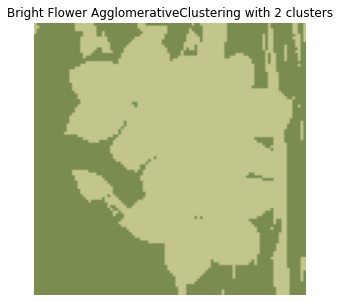

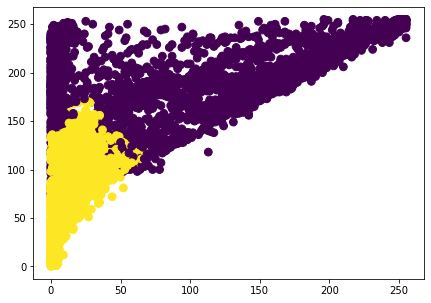

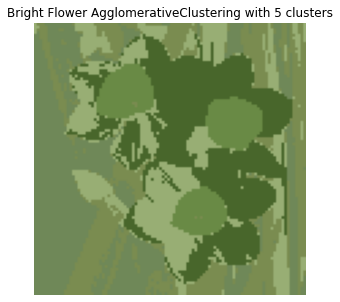

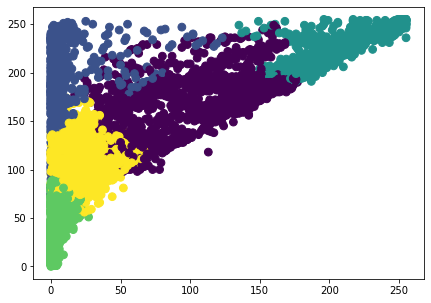

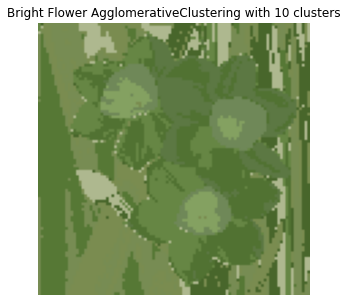

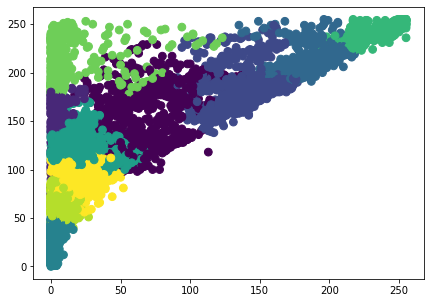

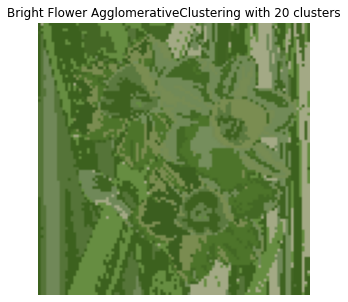

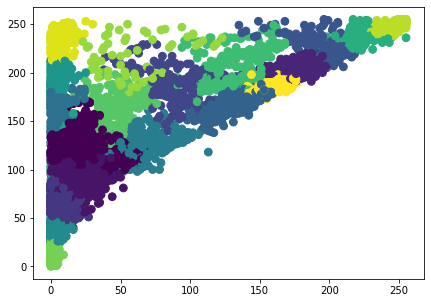

In [ ]:
clst = [2, 5, 10, 20]
img_agglo = []
for i in clst:
    cls = agglo_func(clusters = i, X = X)
    zipp_agglo = list(zip(X, cls))
    centers_lst_agglo = centers_of_clusters(zipp_agglo)
    image = centers_lst_agglo[cls].reshape(x, y, z).astype('int')
    title = f'Bright Flower AgglomerativeClustering with {i} clusters'
    draw_picture(image, title = title , bgr=False)
    img_agglo.append(image)
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=cls, s=60)

### 3.Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
# расчет ssim для KMeans

ssim_m_kmeans = []

for i in img_dbscan:
   ssim_metric = ssim(img, i, multichannel=True)
   ssim_m_kmeans.append(ssim_metric)

In [ ]:
ssim_m_kmeans

[0.5230758043614122,
 0.6317942065983781,
 0.7360496234055004,
 0.8153728506052907]

Вывод: самая высокая метрика при разбиении на 20 кластеров

In [ ]:
# расчет ssim для Dbscan
ssim_metric_dbscan = ssim(img, image_dbscan,  multichannel=True)

/usr/local/lib/python3.8/dist-packages/skimage/metrics/_structural_similarity.py:107: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ch_result = structural_similarity(im1[..., ch],


In [ ]:
ssim_metric_dbscan

0.14039001242673052

In [ ]:
# расчет ssim для AgglomerativeClustering
ssim_m_agglo = []

for i in img_agglo:
    ssim_metric = ssim(img_agg, i, multichannel=True)
    ssim_m_agglo.append(ssim_metric)

/usr/local/lib/python3.8/dist-packages/skimage/metrics/_structural_similarity.py:107: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ch_result = structural_similarity(im1[..., ch],


In [ ]:
ssim_m_agglo

[0.3706442076940106,
 0.028051358078321587,
 0.06594608998129771,
 0.11284006240541457]

Вывод: самая высокая метрика при разбиении на 2 кластера

### 4.Сформулируйте выводы по проделанной работе.
a) Какая модель показала лучший результат?

Лучший результат был получен с помощью KMeans (при разбиении на 20 кластеров), худший результат у DBSAN, этот метод не подходит для данной задачи